In [7]:
import torch

In [8]:
torch.__version__

'1.8.1'

## Intro Pytorch

In [11]:
tensor_a = torch.ones(2,2)
tensor_a

tensor([[1., 1.],
        [1., 1.]])

In [37]:
tensor_b = torch.Tensor(2,2)
print(tensor_b)

tensor([[9.1477e-41, 2.5312e+00],
        [1.4013e-45, 0.0000e+00]])


In [14]:
tensor_b.uniform_(0,1)

tensor([[0.7899, 0.5940],
        [0.3620, 0.7808]])

In [18]:
tensor_c = torch.rand(2,2)
tensor_c

tensor([[0.9553, 0.9732],
        [0.7891, 0.3955]])

In [20]:
result = tensor_b + tensor_c
result

tensor([[0.9553, 0.9732],
        [0.7891, 0.3955]])

In [22]:
result.shape

torch.Size([2, 2])

In [25]:
reshape = result.view(4,1)
reshape

tensor([[0.9553],
        [0.9732],
        [0.7891],
        [0.3955]])

In [30]:
points = torch.Tensor([[1.0, 2.0],[3.0, 4.0]])
points

tensor([[1., 2.],
        [3., 4.]])

In [33]:
points[0][1] = 9
print(points)

tensor([[1., 9.],
        [3., 4.]])


In [38]:
points.storage()

 1.0
 9.0
 3.0
 4.0
[torch.FloatStorage of size 4]

In [40]:
points, points.stride()


(tensor([[1., 9.],
         [3., 4.]]),
 (2, 1))

In [43]:
p_t = points.t();
p_t, p_t.stride()

(tensor([[1., 3.],
         [9., 4.]]),
 (1, 2))

In [49]:
tensor_x = torch.Tensor([1,2,3,4])
tensor_x, torch.unsqueeze(tensor_x, 0) #aumentar una dimension

(tensor([1., 2., 3., 4.]), tensor([[1., 2., 3., 4.]]))

In [51]:
torch.unsqueeze(tensor_x, 1)

tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [57]:
import numpy as np
numpyArray = np.random.randn(2,2)
torch.from_numpy(numpyArray)

tensor([[-0.7327,  0.0661],
        [-2.2196, -0.6856]], dtype=torch.float64)

## Representacion de datos con tensores

In [59]:
from_numpy = torch.from_numpy(numpyArray)

tensor([[-0.7327,  0.0661],
        [-2.2196, -0.6856]], dtype=torch.float64)

In [60]:
torch.mean(from_numpy)

tensor(-0.8929, dtype=torch.float64)

In [61]:
torch.mean(from_numpy, dim = 0)

tensor([-1.4761, -0.3097], dtype=torch.float64)

In [62]:
torch.mean(from_numpy, dim = 1)

tensor([-0.3333, -1.4526], dtype=torch.float64)

In [63]:
torch.std(from_numpy)

tensor(0.9572, dtype=torch.float64)

In [64]:
torch.save(from_numpy, "tensor.t")

In [66]:
load = torch.load("tensor.t")
load

tensor([[-0.7327,  0.0661],
        [-2.2196, -0.6856]], dtype=torch.float64)

In [78]:
import pandas as pd
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [79]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [90]:
subset = df[['YearsExperience','Salary']]

tensores = torch.tensor(subset.values).float()
tensores.shape, tensores.type()

(torch.Size([30, 2]), 'torch.FloatTensor')

In [92]:
data = tensores[:, 1:]
data, data.shape

(tensor([[ 39343.],
         [ 46205.],
         [ 37731.],
         [ 43525.],
         [ 39891.],
         [ 56642.],
         [ 60150.],
         [ 54445.],
         [ 64445.],
         [ 57189.],
         [ 63218.],
         [ 55794.],
         [ 56957.],
         [ 57081.],
         [ 61111.],
         [ 67938.],
         [ 66029.],
         [ 83088.],
         [ 81363.],
         [ 93940.],
         [ 91738.],
         [ 98273.],
         [101302.],
         [113812.],
         [109431.],
         [105582.],
         [116969.],
         [112635.],
         [122391.],
         [121872.]]),
 torch.Size([30, 1]))

In [94]:
data = tensores[:,0]
data , data.shape

(tensor([ 1.1000,  1.3000,  1.5000,  2.0000,  2.2000,  2.9000,  3.0000,  3.2000,
          3.2000,  3.7000,  3.9000,  4.0000,  4.0000,  4.1000,  4.5000,  4.9000,
          5.1000,  5.3000,  5.9000,  6.0000,  6.8000,  7.1000,  7.9000,  8.2000,
          8.7000,  9.0000,  9.5000,  9.6000, 10.3000, 10.5000]),
 torch.Size([30]))

In [95]:
torch.mean(data, axis = 0)

tensor(5.3133)

In [97]:
data[torch.ge(Salary, 85)]

NameError: name 'Salary' is not defined

In [98]:
data[torch.gt(target, 85)

SyntaxError: unexpected EOF while parsing (<ipython-input-98-6e4d5524675a>, line 1)

## Regresion lineal

In [4]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

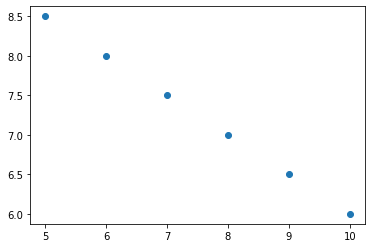

In [10]:
plt.scatter(car_prices, units_sold)

In [14]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

prices_array.ndim

2

In [19]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, units.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True),
 torch.Size([6, 1]))

5.158843805475044e-07


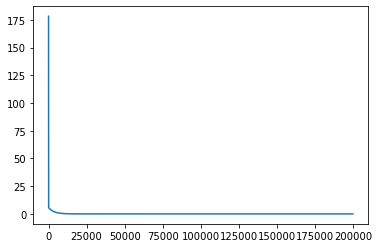

In [28]:
model = nn.Linear(1,1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(),lr = 0.0015)  #stocastic gradien decend

losses = []
iterations = 200000

for i in range(iterations):
    pred = model(prices)
    loss = loss_function(pred, units)
    losses.append(loss.data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [33]:
x = torch.Tensor([[7.0]])
p = model(x)
print(p)

tensor([[7.4996]], grad_fn=<AddmmBackward>)


## Regresion logistica

In [35]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)* 3
data

array([[ 3.36673350e-01, -1.43220457e+00],
       [ 1.31350760e+00,  3.57732929e-01],
       [-6.72118978e-01,  3.76121285e-01],
       [ 3.85660452e-01,  4.84252156e+00],
       [ 3.75572795e-01,  4.66021158e+00],
       [-2.78609144e+00, -3.77857000e-02],
       [-3.23528031e+00,  4.84161877e+00],
       [-2.50757572e+00,  8.29687735e-01],
       [-5.82775934e+00, -8.01981565e-01],
       [ 6.96525020e-01, -2.42260707e+00],
       [-9.68082171e-01, -5.58100964e+00],
       [-1.96139933e+00, -8.88404862e+00],
       [ 9.16764516e-01, -4.23066394e+00],
       [-3.58689605e+00, -3.50373868e+00],
       [-5.59096293e+00, -5.49032337e-01],
       [-2.21937972e+00, -2.47510660e-01],
       [-5.22208483e-01,  3.74051332e+00],
       [ 1.23845698e+00,  4.34368587e+00],
       [-1.30168547e+00, -1.66622676e+00],
       [ 1.47954500e+00, -8.66215059e-01],
       [ 2.13604437e+00, -5.35134570e-01],
       [ 5.68687705e+00,  3.74491385e+00],
       [-1.69015421e+00, -4.42720562e+00],
       [ 2.

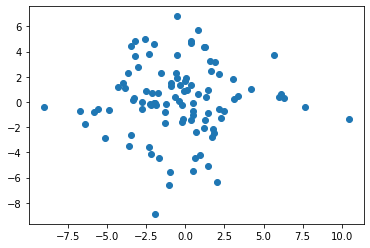

In [37]:
plt.scatter(data[:,0],data[:,1])

In [39]:
data[:h,:] = data[:h,:] - 3*np.ones((h, dimen))

In [41]:
data[h:,:] = data[h:,:] + 3*np.ones((h, dimen))

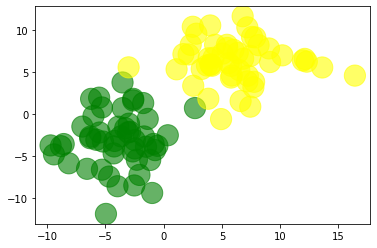

In [63]:
colors = ["green","yellow",]
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0],data[:,1], c = color, s=30*15, alpha = 0.6)

In [53]:
target = np.array([0]*h + [1]*h).reshape(n,1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

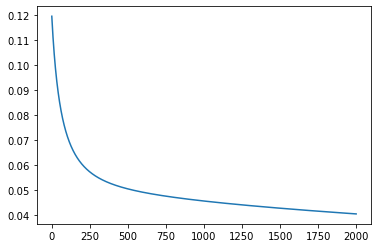

In [64]:
model = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid())
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr = 0.015)

losses = []

iterations = 2000

for i in range(iterations):
    result = model(x)

    loss = loss_function(result, y)
    losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step();

plt.plot(range(iterations), losses)

In [67]:
amarrillo = torch.Tensor([[5, 7.5]])
prediction = model(amarrillo).data[0][0] > 0.5
print(colors[prediction])

yellow


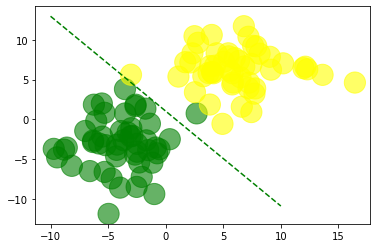

In [80]:
W = list(model.parameters())
W0 = w[0].data.numpy()
W1 = w[1].data.numpy()

plt.scatter(data[:,0],data[:,1], c = color, s=30*15, alpha = 0.6)
x_axis = np.linspace(-10,10,n)
y_axis = -(W1[0] + x_axis*W0[0][0]) / W0[0][1]
plt.plot(x_axis, y_axis, 'g--')

NameError: name 'W0' is not defined

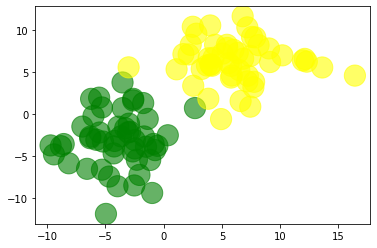

In [72]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0],data[:,1], c = color, s=30*15, alpha = 0.6)

x_axis = np.linspace(-10,10,n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / W0[0][1]
plt.plot(x_axis, y_axis, 'g--')